# 🤯🤯🤯🤯🤯 FFN 🤯🤯🤯🤯🤯

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
# !pip install tensorflow torch transformers

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Flatten
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("dark_background")


In [ ]:
bbc_df = pd.read_csv("bbc_dataset_preprocessed.csv")
bbc_df.head()


,file_name,category,text,cleaned_text,normalized_text,lemmatized_normalized_text
0,001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...,ad sales boost time warner profit quarterly pr...,ad sale boost time warner profit quarterli pro...,ad sale boost time warner profit quarterly pro...
1,002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...,dollar gains on greenspan speech the dollar ha...,dollar gain greenspan speech dollar hit highes...,dollar gain greenspan speech dollar hit highes...
2,003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...,yukos unit buyer faces loan claim the owners o...,yuko unit buyer face loan claim owner embattl ...,yukos unit buyer face loan claim owner embattl...
3,004.txt,business,High fuel prices hit BA's profits\n\nBritish A...,high fuel prices hit ba s profits british airw...,high fuel price hit ba profit british airway b...,high fuel price hit ba profit british airway b...
4,005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...,pernod takeover talk lifts domecq shares in uk...,pernod takeov talk lift domecq share uk drink ...,pernod takeover talk lift domecq share uk drin...


1. Encode categorical labels
2. Tokenize text data
3. Convert text to sequences and pads them to a uniform length
4. Create a simple FFN with 3 hidden layers and dropout for regularization
5. Use early stopping to prevent overfitting
6. Evaluate the model and visualizes the results

X_train shape: (1780, 200)
X_test shape: (445, 200)
y_train shape: (1780, 5)
y_test shape: (445, 5)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2371 - loss: 1.5884 - val_accuracy: 0.5112 - val_loss: 1.3731
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6180 - loss: 1.0914 - val_accuracy: 0.9213 - val_loss: 0.3572
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9694 - loss: 0.1370 - val_accuracy: 0.9466 - val_loss: 0.1712
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9971 - loss: 0.0242 - val_accuracy: 0.9579 - val_loss: 0.1391
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 0.0069 - val_accuracy: 0.9635 - val_loss: 0.1350
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9607 - val_loss: 0.1328
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.9551 - val_loss: 0.1419
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9607 - val_loss

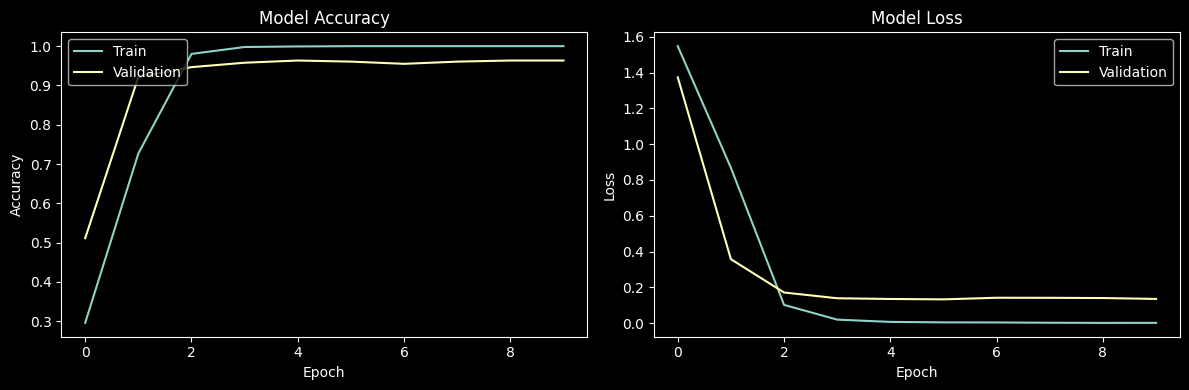

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Classification Report:
               precision    recall  f1-score   support

     business       0.89      0.95      0.92       102
entertainment       0.95      0.92      0.93        77
     politics       0.94      0.93      0.93        84
        sport       1.00      0.99      1.00       102
         tech       0.95      0.91      0.93        80

     accuracy                           0.94       445
    macro avg       0.94      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



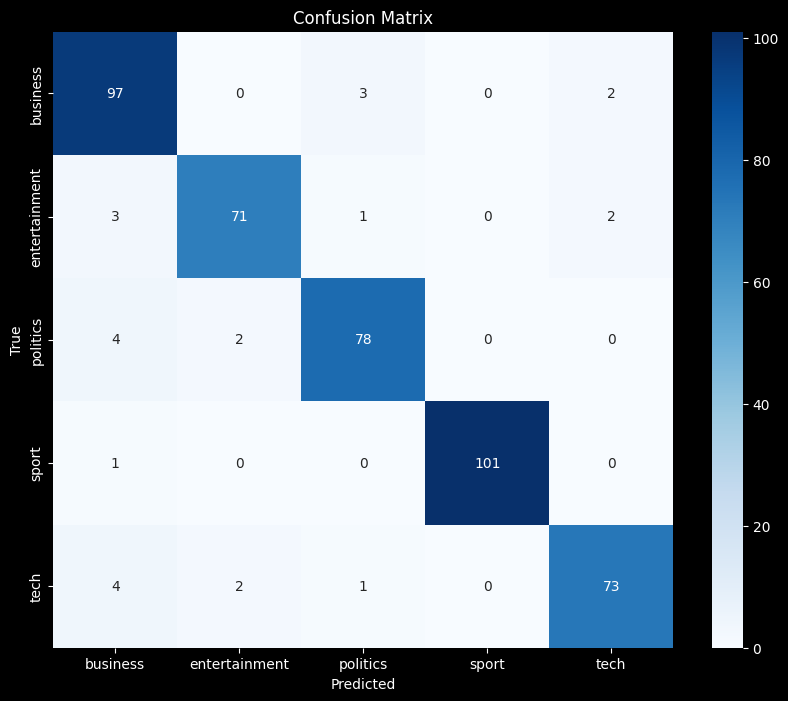

In [ ]:
X = bbc_df['lemmatized_normalized_text']
y = bbc_df['category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# Tokenize the text with a lower max_words value
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Print shapes to verify data
print(f"X_train shape: {X_train_pad.shape}")
print(f"X_test shape: {X_test_pad.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Feed Forward Neural Network with embedding
model = Sequential([
    # Add an embedding layer - this is key for text data
    Embedding(input_dim=max_words, output_dim=128),

    # Flatten the embedded sequences
    Flatten(),

    # First dense layer with a higher unit count
    Dense(256, activation='relu'),
    Dropout(0.5),  # Increase dropout for regularization

    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(y_categorical.shape[1], activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad,
    y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Predictions and classification report
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# 🤐🤐🤐🤐🤐 CNN 🤐🤐🤐🤐🤐

CNN: Excels at detecting local patterns and features in sequences (like n-grams or word phrases) regardless of their position in the text

FFN: Processes all input features independently without considering sequential relationships

CNN: Automatically extracts relevant features through convolutional filters that slide over the text

FFN: Relies on pre-extracted features or embeddings without further feature extraction

CNN: Uses parameter sharing in filters, making them more efficient for sequence data

FFN: Requires more parameters to capture the same level of pattern complexity

CNN: Can capture local context with different filter sizes (e.g., 2, 3, 4-word phrases)

FFN: Lacks built-in mechanisms for capturing sequential relationships

CNN architecture: [Convolutional Neural Networks for Sentence Classification](https://arxiv.org/pdf/1408.5882)

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model


1. Parallel Convolutional Layers: We use four different filter sizes (2, 3, 4, and 5) to capture different n-gram patterns in the text. This helps the model recognize:
- 2-word phrases (bigrams)
- 3-word phrases (trigrams)
- 4-word phrases (4-grams)
- 5-word phrases (5-grams)
2. GlobalMaxPooling: For each convolutional filter, we apply global max pooling to extract the most important features.
3. Feature Concatenation: We combine all these pooled features to create a rich representation of the text that captures multiple levels of context.
4. Deep Dense Layers: Two dense layers with dropout for regularization help the model learn complex patterns in the concatenated features.

X_train shape: (1780, 200)
X_test shape: (445, 200)
y_train shape: (1780, 5)
y_test shape: (445, 5)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 200, 128)       │        640,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 199, 128)       │         32,896 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 198, 128)       │         49,280 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 197, 128)       │         65,664 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 196, 128)       │         82,048 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 128)            │              0 │ conv1d[0][0]           │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 128)            │              0 │ conv1d_1[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 128)            │              0 │ conv1d_2[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_3    │ (None, 128)            │              0 │ conv1d_3[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ global_max_pooling1d[… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │        131,328 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │         32,896 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)      

 Total params: 1,034,757 (3.95 MB)

 Trainable params: 1,034,757 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.2205 - loss: 1.6133 - val_accuracy: 0.2640 - val_loss: 1.5452
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4121 - loss: 1.4329 - val_accuracy: 0.8174 - val_loss: 0.6413
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7979 - loss: 0.6083 - val_accuracy: 0.9213 - val_loss: 0.2324
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9497 - loss: 0.1840 - val_accuracy: 0.9494 - val_loss: 0.1688
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9873 - loss: 0.0520 - val_accuracy: 0.9635 - val_loss: 0.1605
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy: 0.9663 - val_loss: 0.1806
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9968 - loss: 0.0216 - val_accuracy: 0.9635 - val_loss: 0.1932
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9972 - loss: 0.0103 - val_accuracy: 0.9579 - val_l

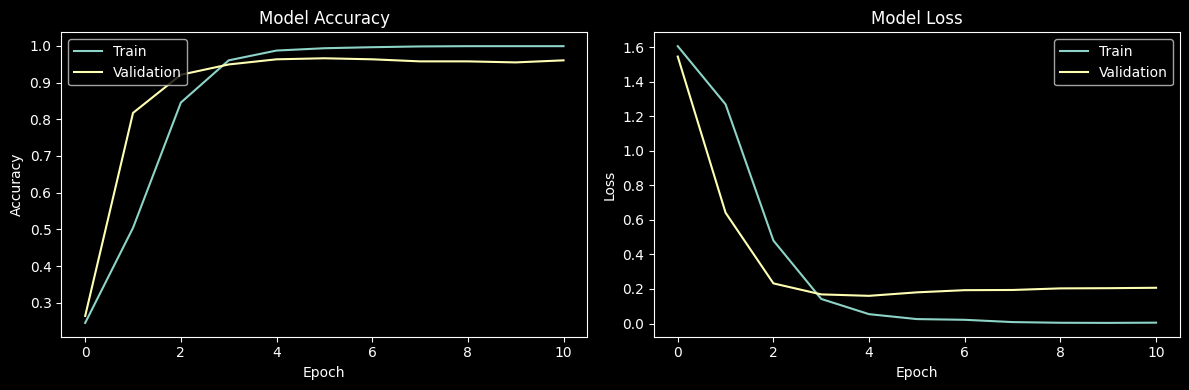

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step

Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.89      0.92       102
entertainment       0.95      0.96      0.95        77
     politics       0.93      0.95      0.94        84
        sport       0.99      0.99      0.99       102
         tech       0.92      0.96      0.94        80

     accuracy                           0.95       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



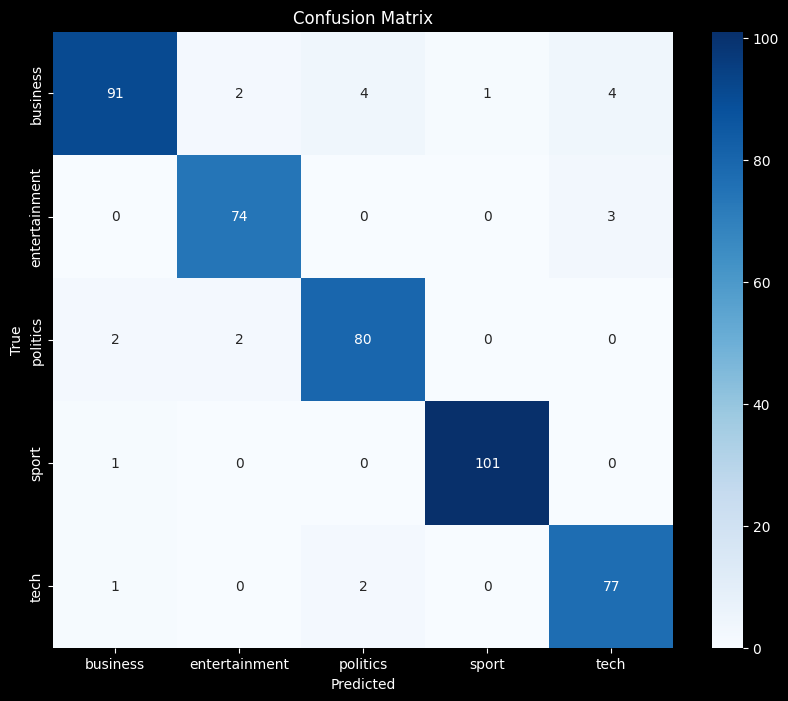

In [ ]:
X = bbc_df['lemmatized_normalized_text']
y = bbc_df['category']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# Tokenize the text
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Print shapes to verify data
print(f"X_train shape: {X_train_pad.shape}")
print(f"X_test shape: {X_test_pad.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Build multi-filter CNN model
# Input layer
inputs = Input(shape=(max_len,))
embedding = Embedding(input_dim=max_words, output_dim=128)(inputs)

# Parallel convolutional layers with different filter sizes (2, 3, 4, 5)
conv1 = Conv1D(filters=128, kernel_size=2, padding='valid', activation='relu')(embedding)
conv2 = Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu')(embedding)
conv3 = Conv1D(filters=128, kernel_size=4, padding='valid', activation='relu')(embedding)
conv4 = Conv1D(filters=128, kernel_size=5, padding='valid', activation='relu')(embedding)

# Max pooling for each convolutional layer
pool1 = GlobalMaxPooling1D()(conv1)
pool2 = GlobalMaxPooling1D()(conv2)
pool3 = GlobalMaxPooling1D()(conv3)
pool4 = GlobalMaxPooling1D()(conv4)

# Concatenate the pooled features
concatenated = Concatenate()([pool1, pool2, pool3, pool4])

# Dense layers
dense = Dense(256, activation='relu')(concatenated)
dropout1 = Dropout(0.5)(dense)
dense2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)
outputs = Dense(y_categorical.shape[1], activation='softmax')(dropout2)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train with early stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad,
    y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Predictions and classification report
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# DistilBERT

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.optim import AdamW
from transformers import get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import os

# Set seed for reproducibility
def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

set_seed()

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
bbc_df = pd.read_csv("bbc_dataset_preprocessed.csv")
print(f"Dataset shape: {bbc_df.shape}")
print(bbc_df.head())

# Check category distribution
print("\nCategory distribution:")
print(bbc_df['category'].value_counts())

# Encode labels
label_encoder = LabelEncoder()
bbc_df['label'] = label_encoder.fit_transform(bbc_df['category'])
print("\nEncoded labels:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

# Split the data - first into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    bbc_df['text'].values,
    bbc_df['label'].values,
    test_size=0.2,
    stratify=bbc_df['label'].values,
    random_state=42
)

# Then split the temp set into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,  # 0.25 * 0.8 = 0.2 of original data
    stratify=y_temp,
    random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")

# Create PyTorch dataset
class BBCDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):  # Reduced from 512
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Clear CUDA cache if using GPU
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Initialize tokenizer and model
print("\nLoading model and tokenizer...")
model_name = 'distilroberta-base'  # Using smaller model to save memory
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_encoder.classes_)
)
model.to(device)

# Create data loaders
batch_size = 2  # Reduced from 8

train_dataset = BBCDataset(X_train, y_train, tokenizer)
val_dataset = BBCDataset(X_val, y_val, tokenizer)
test_dataset = BBCDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Training parameters
epochs = 4
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
total_steps = len(train_loader) * epochs
scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training function with gradient accumulation
def train_epoch(model, data_loader, optimizer, scheduler, device, accumulation_steps=4):
    model.train()
    total_loss = 0

    optimizer.zero_grad()  # Zero gradients once at the beginning

    progress_bar = tqdm(data_loader, desc="Training", leave=False)

    for i, batch in enumerate(progress_bar):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        # Get loss and divide by accumulation steps for gradient accumulation
        loss = outputs.loss / accumulation_steps
        total_loss += loss.item() * accumulation_steps  # Multiply back for logging

        # Backward pass
        loss.backward()

        # Update weights only after accumulating gradients for several steps
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(data_loader):
            # Clip gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Update parameters
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

        # Report loss value
        progress_bar.set_postfix({'loss': loss.item() * accumulation_steps})

    # Calculate average loss over all batches
    return total_loss / len(data_loader)

# Evaluation function
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

    return predictions, actual_labels

# Training loop
print("\nTraining RoBERTa model:")
train_losses = []
val_losses = []
best_val_loss = float('inf')
best_model_state = None
patience = 2  # For early stopping
patience_counter = 0

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Train for one epoch
    train_loss = train_epoch(model, train_loader, optimizer, scheduler, device)
    train_losses.append(train_loss)

    print(f"Training loss: {train_loss}")

    # Evaluate on validation set
    model.eval()
    val_loss = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            val_loss += loss.item()

            _, preds = torch.max(outputs.logits, dim=1)
            val_preds.extend(preds.cpu().tolist())
            val_labels.extend(labels.cpu().tolist())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    val_accuracy = (np.array(val_preds) == np.array(val_labels)).mean() * 100
    print(f"Validation loss: {avg_val_loss:.4f}, Validation accuracy: {val_accuracy:.2f}%")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict().copy()
        patience_counter = 0
        print(f"New best model saved with validation loss: {best_val_loss:.4f}")
    else:
        patience_counter += 1
        print(f"Validation loss did not improve. Patience: {patience_counter}/{patience}")

    # Early stopping
    if patience_counter >= patience:
        print(f"Early stopping triggered after {epoch+1} epochs")
        break

# Load best model for final evaluation
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Loaded best model based on validation loss for final evaluation.")

# Final evaluation
print("\nFinal evaluation:")
predictions, actual_labels = evaluate(model, test_loader, device)

# Convert numerical labels back to original categories
predicted_categories = label_encoder.inverse_transform(predictions)
actual_categories = label_encoder.inverse_transform(actual_labels)

# Print classification report
print("\nClassification Report:")
print(classification_report(actual_categories, predicted_categories))

# Display confusion matrix
cm = confusion_matrix(actual_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.close()

# Example prediction function
def predict_category(text, model, tokenizer, label_encoder, device, max_length=512):
    model.eval()
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs.logits, dim=1)

    predicted_label = preds.item()
    predicted_category = label_encoder.inverse_transform([predicted_label])[0]

    return predicted_category

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_curves.png')
plt.close()

# Save the model
output_dir = './roberta_bbc_model/'
os.makedirs(output_dir, exist_ok=True)

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Save the label encoder
import pickle
with open(f"{output_dir}label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print(f"Model saved to {output_dir}")

# Test the model with some examples
print("\nTesting with examples:")
test_examples = X_test[:3]
for text in test_examples:
    category = predict_category(text, model, tokenizer, label_encoder, device)
    print(f"\nText: {text[:150]}...")
    print(f"Predicted category: {category}")

Using device: cuda
Dataset shape: (2225, 6)
  file_name  category                                               text  \
0   001.txt  business  Ad sales boost Time Warner profit\n\nQuarterly...   
1   002.txt  business  Dollar gains on Greenspan speech\n\nThe dollar...   
2   003.txt  business  Yukos unit buyer faces loan claim\n\nThe owner...   
3   004.txt  business  High fuel prices hit BA's profits\n\nBritish A...   
4   005.txt  business  Pernod takeover talk lifts Domecq\n\nShares in...   

                                        cleaned_text  \
0  ad sales boost time warner profit quarterly pr...   
1  dollar gains on greenspan speech the dollar ha...   
2  yukos unit buyer faces loan claim the owners o...   
3  high fuel prices hit ba s profits british airw...   
4  pernod takeover talk lifts domecq shares in uk...   

                                     normalized_text  \
0  ad sale boost time warner profit quarterli pro...   
1  dollar gain greenspan speech dollar hit highes.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training RoBERTa model:

Epoch 1/4


Training loss: 0.4435988094833328


Validation loss: 0.0882, Validation accuracy: 97.53%
New best model saved with validation loss: 0.0882

Epoch 2/4


Training loss: 0.05591703485627798


Validation loss: 0.1298, Validation accuracy: 97.53%
Validation loss did not improve. Patience: 1/2

Epoch 3/4


Training loss: 0.027542872649086305


Validation loss: 0.1640, Validation accuracy: 97.08%
Validation loss did not improve. Patience: 2/2
Early stopping triggered after 3 epochs
Loaded best model based on validation loss for final evaluation.

Final evaluation:



Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.97      0.99       102
entertainment       0.93      1.00      0.96        77
     politics       0.99      0.96      0.98        84
        sport       1.00      1.00      1.00       102
         tech       0.99      0.97      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

Model saved to ./roberta_bbc_model/

Testing with examples:

Text: French suitor holds LSE meeting

European stock market Euronext has met with the London Stock Exchange (LSE) amid speculation that it may be ready to ...
Predicted category: business

Text: Durex maker SSL awaits firm bid

UK condom maker SSL International has refused to comment on reports it may be subject to a takeover early in 2005.

A...
Predicted category: business

Text: Singer's film to show at festiv

In [ ]:
category = predict_category("The new Iphone 17 has a 48mp camera", model, tokenizer, label_encoder, device)
print(category)
category = predict_category("Mr Trump announced the 37th tariff package", model, tokenizer, label_encoder, device)
print(category)

tech
business


# ⚾⚾⚾⚾⚾RoBERTa⚾⚾⚾⚾⚾

### Data Preparation:
- Load the BBC dataset
- Encodes category labels into numerical values
- Splits data into training, validation and testing sets

### RoBERTa Setup:
- Uses the pre-trained roberta-base model from Hugging Face
- Adds a classification head on top of existing categories
- Creates a custom dataset class to handle the tokenization

### Training Process:
- Fine-tunes RoBERTa on BBC articles
- Uses AdamW optimizer with a learning rate scheduler
- Implements gradient clipping for stability
- Tracks loss during training

### Evaluation:
- Generates predictions on the test set
- Creates a classification report with precision, recall, and F1-score
- Visualizes results with a confusion matrix

### Practical Usage:
- Includes a function to make predictions on new texts
- Saves the trained model for future use

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.optim import AdamW
from transformers import get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import os

# Set seed for reproducibility
def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

set_seed()

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
bbc_df = pd.read_csv("bbc_dataset_preprocessed.csv")
print(f"Dataset shape: {bbc_df.shape}")
print(bbc_df.head())

# Check category distribution
print("\nCategory distribution:")
print(bbc_df['category'].value_counts())

# Encode labels
label_encoder = LabelEncoder()
bbc_df['label'] = label_encoder.fit_transform(bbc_df['category'])
print("\nEncoded labels:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

# Split the data - first into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    bbc_df['text'].values,
    bbc_df['label'].values,
    test_size=0.2,
    stratify=bbc_df['label'].values,
    random_state=42
)

# Then split the temp set into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,  # 0.25 * 0.8 = 0.2 of original data
    stratify=y_temp,
    random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")

# Create PyTorch dataset
class BBCDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):  # Reduced from 512
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Clear CUDA cache if using GPU
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Initialize tokenizer and model
print("\nLoading model and tokenizer...")
model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_encoder.classes_)
)
model.to(device)

# Create data loaders
batch_size = 2  # Reduced from 8

train_dataset = BBCDataset(X_train, y_train, tokenizer)
val_dataset = BBCDataset(X_val, y_val, tokenizer)
test_dataset = BBCDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Training parameters
epochs = 4
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
total_steps = len(train_loader) * epochs
scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training function with gradient accumulation
def train_epoch(model, data_loader, optimizer, scheduler, device, accumulation_steps=4):
    model.train()
    total_loss = 0

    optimizer.zero_grad()  # Zero gradients once at the beginning

    progress_bar = tqdm(data_loader, desc="Training", leave=False)

    for i, batch in enumerate(progress_bar):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        # Get loss and divide by accumulation steps for gradient accumulation
        loss = outputs.loss / accumulation_steps
        total_loss += loss.item() * accumulation_steps  # Multiply back for logging

        # Backward pass
        loss.backward()

        # Update weights only after accumulating gradients for several steps
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(data_loader):
            # Clip gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Update parameters
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

        # Report loss value
        progress_bar.set_postfix({'loss': loss.item() * accumulation_steps})

    # Calculate average loss over all batches
    return total_loss / len(data_loader)

# Evaluation function
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

    return predictions, actual_labels

# Training loop
print("\nTraining RoBERTa model:")
train_losses = []
val_losses = []
best_val_loss = float('inf')
best_model_state = None
patience = 2  # For early stopping
patience_counter = 0

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Train for one epoch
    train_loss = train_epoch(model, train_loader, optimizer, scheduler, device)
    train_losses.append(train_loss)

    print(f"Training loss: {train_loss}")

    # Evaluate on validation set
    model.eval()
    val_loss = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            val_loss += loss.item()

            _, preds = torch.max(outputs.logits, dim=1)
            val_preds.extend(preds.cpu().tolist())
            val_labels.extend(labels.cpu().tolist())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    val_accuracy = (np.array(val_preds) == np.array(val_labels)).mean() * 100
    print(f"Validation loss: {avg_val_loss:.4f}, Validation accuracy: {val_accuracy:.2f}%")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict().copy()
        patience_counter = 0
        print(f"New best model saved with validation loss: {best_val_loss:.4f}")
    else:
        patience_counter += 1
        print(f"Validation loss did not improve. Patience: {patience_counter}/{patience}")

    # Early stopping
    if patience_counter >= patience:
        print(f"Early stopping triggered after {epoch+1} epochs")
        break

# Load best model for final evaluation
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Loaded best model based on validation loss for final evaluation.")

# Final evaluation
print("\nFinal evaluation:")
predictions, actual_labels = evaluate(model, test_loader, device)

# Convert numerical labels back to original categories
predicted_categories = label_encoder.inverse_transform(predictions)
actual_categories = label_encoder.inverse_transform(actual_labels)

# Print classification report
print("\nClassification Report:")
print(classification_report(actual_categories, predicted_categories))

# Display confusion matrix
cm = confusion_matrix(actual_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.close()

# Example prediction function
def predict_category(text, model, tokenizer, label_encoder, device, max_length=512):
    model.eval()
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs.logits, dim=1)

    predicted_label = preds.item()
    predicted_category = label_encoder.inverse_transform([predicted_label])[0]

    return predicted_category

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_curves.png')
plt.close()

# Save the model
output_dir = './roberta_bbc_model/'
os.makedirs(output_dir, exist_ok=True)

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Save the label encoder
import pickle
with open(f"{output_dir}label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print(f"Model saved to {output_dir}")

# Test the model with some examples
print("\nTesting with examples:")
test_examples = X_test[:3]
for text in test_examples:
    category = predict_category(text, model, tokenizer, label_encoder, device)
    print(f"\nText: {text[:150]}...")
    print(f"Predicted category: {category}")

Using device: cuda
Dataset shape: (2225, 6)
  file_name  category                                               text  \
0   001.txt  business  Ad sales boost Time Warner profit\n\nQuarterly...   
1   002.txt  business  Dollar gains on Greenspan speech\n\nThe dollar...   
2   003.txt  business  Yukos unit buyer faces loan claim\n\nThe owner...   
3   004.txt  business  High fuel prices hit BA's profits\n\nBritish A...   
4   005.txt  business  Pernod takeover talk lifts Domecq\n\nShares in...   

                                        cleaned_text  \
0  ad sales boost time warner profit quarterly pr...   
1  dollar gains on greenspan speech the dollar ha...   
2  yukos unit buyer faces loan claim the owners o...   
3  high fuel prices hit ba s profits british airw...   
4  pernod takeover talk lifts domecq shares in uk...   

                                     normalized_text  \
0  ad sale boost time warner profit quarterli pro...   
1  dollar gain greenspan speech dollar hit highes.

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training RoBERTa model:

Epoch 1/4


Training loss: 0.45756474505234396


Validation loss: 0.0854, Validation accuracy: 97.98%
New best model saved with validation loss: 0.0854

Epoch 2/4


Training loss: 0.07071884053035689


Validation loss: 0.1642, Validation accuracy: 96.63%
Validation loss did not improve. Patience: 1/2

Epoch 3/4


Training loss: 0.03590883394671202


Validation loss: 0.1374, Validation accuracy: 97.75%
Validation loss did not improve. Patience: 2/2
Early stopping triggered after 3 epochs
Loaded best model based on validation loss for final evaluation.

Final evaluation:



Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.99      0.98       102
entertainment       0.99      1.00      0.99        77
     politics       0.99      0.98      0.98        84
        sport       1.00      1.00      1.00       102
         tech       1.00      0.97      0.99        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445

Model saved to ./roberta_bbc_model/

Testing with examples:

Text: French suitor holds LSE meeting

European stock market Euronext has met with the London Stock Exchange (LSE) amid speculation that it may be ready to ...
Predicted category: business

Text: Durex maker SSL awaits firm bid

UK condom maker SSL International has refused to comment on reports it may be subject to a takeover early in 2005.

A...
Predicted category: business

Text: Singer's film to show at festiv

# 0-shot methods

In [ ]:
from transformers import pipeline

# Initialize zero-shot classifier
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

# Categories
categories = ["business", "entertainment", "politics", "sport", "tech"]

# Example text
text = "Oil prices rise amid supply concerns as negotiations continue"

# Make prediction
result = classifier(text, categories)
print(f"Predicted label: {result['labels'][0]}")
print(f"Scores: {result['scores']}")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Predicted label: business
Scores: [0.7560350894927979, 0.06572695076465607, 0.062204401940107346, 0.06045011058449745, 0.05558345466852188]


In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import classification_report

# Load your dataset
bbc_df = pd.read_csv("bbc_dataset_preprocessed.csv")

# Initialize classifier
classifier = pipeline("zero-shot-classification",
                     model="facebook/bart-large-mnli",
                     device=0)  # Use GPU if available

# Define categories
categories = ["business", "entertainment", "politics", "sport", "tech"]

# Create a smaller sample for testing if needed
sample_df = bbc_df.sample(100, random_state=42)

# Make predictions
predictions = []
for text in sample_df['text'].values:
    result = classifier(text, categories)
    predictions.append(result['labels'][0])

# Evaluate
print(classification_report(sample_df['category'], predictions))

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


               precision    recall  f1-score   support

     business       0.62      0.81      0.70        32
entertainment       0.40      0.21      0.28        19
     politics       0.72      0.87      0.79        15
        sport       0.76      0.52      0.62        25
         tech       0.31      0.44      0.36         9

     accuracy                           0.60       100
    macro avg       0.56      0.57      0.55       100
 weighted avg       0.60      0.60      0.58       100



In [ ]:
from sklearn.metrics import classification_report
from transformers import pipeline
from datasets import Dataset
import pandas as pd

# Load your dataset
bbc_df = pd.read_csv("bbc_dataset_preprocessed.csv")

# Initialize classifier
classifier = pipeline("zero-shot-classification",
                     model="roberta-large-mnli",
                     device=0)  # Use GPU if available

# Define categories
categories = ["business", "entertainment", "politics", "sport", "tech"]

# Convert to datasets format
texts = bbc_df['text'].tolist()
ds = Dataset.from_dict({"text": texts})

# Run batched inference
results = classifier(ds["text"], categories, batch_size=16)
predictions = [r['labels'][0] for r in results]

# Evaluate
print(classification_report(bbc_df['category'], predictions))

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


ValueError: Found input variables with inconsistent numbers of samples: [100, 2225]

# SentenceTransformer

In [ ]:
from sentence_transformers import SentenceTransformer
import torch
import numpy as np

# Load model
model = SentenceTransformer('all-mpnet-base-v2')

# Define categories and descriptions
categories = ["business", "entertainment", "politics", "sport", "tech"]
descriptions = [
    "News about companies, markets, economy, and financial matters",
    "News about movies, music, celebrities, and arts",
    "News about government, elections, policies, and international relations",
    "News about sports events, athletes, teams, and competitions",
    "News about technology, gadgets, software, and innovation"
]

# Encode category descriptions
category_embeddings = model.encode(descriptions)

# Function to classify
def classify_text(text):
    # Encode text
    text_embedding = model.encode(text)

    # Calculate similarities
    similarities = torch.nn.functional.cosine_similarity(
        torch.tensor(text_embedding).unsqueeze(0),
        torch.tensor(category_embeddings)
    )

    # Get most similar category
    category_idx = torch.argmax(similarities).item()
    return categories[category_idx]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
classify_text("""Durex maker SSL awaits firm bid
UK condom maker SSL International has refused to comment on reports it may be subject to a takeover early in 2005.""")

'business'

# 0shot comprehend_it-base

In [ ]:
from sklearn.metrics import classification_report
from transformers import pipeline
from datasets import Dataset
import pandas as pd
import torch

# --- Configuration ---
MODEL_NAME = "knowledgator/comprehend_it-base"
CSV_FILE = "bbc_dataset_preprocessed.csv"
TEXT_COLUMN = "text"
LABEL_COLUMN = "category"
BATCH_SIZE = 64

# --- Load your dataset ---
try:
    bbc_df = pd.read_csv(CSV_FILE)
    print(f"Dataset loaded successfully. Shape: {bbc_df.shape}")
    # Verify columns exist
    if TEXT_COLUMN not in bbc_df.columns or LABEL_COLUMN not in bbc_df.columns:
        raise ValueError(f"CSV must contain '{TEXT_COLUMN}' and '{LABEL_COLUMN}' columns.")
except FileNotFoundError:
    print(f"Error: CSV file not found at {CSV_FILE}")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

categories = bbc_df[LABEL_COLUMN].unique().tolist()

# --- Initialize classifier ---
# Check for GPU availability
device_index = 0 if torch.cuda.is_available() else -1
print(f"Using device: {'cuda:' + str(device_index) if device_index >= 0 else 'cpu'}")

try:
    classifier = pipeline(
        "zero-shot-classification",
        model=MODEL_NAME,
        device=device_index  # Use GPU if available (0), otherwise CPU (-1)
    )
    print(f"Pipeline initialized with model: {MODEL_NAME}")
except Exception as e:
    print(f"Error initializing pipeline: {e}")
    print("Ensure you have 'transformers' and potentially 'torch' installed correctly.")
    print("You might need to install sentencepiece: pip install sentencepiece")
    exit()

texts = bbc_df[TEXT_COLUMN].tolist()
true_labels = bbc_df[LABEL_COLUMN].tolist()

# The pipeline can often handle raw lists of strings directly
# ds = Dataset.from_dict({TEXT_COLUMN: texts}) # Dataset conversion not strictly necessary for list input

# --- Run batched inference ---
print(f"Starting zero-shot classification for {len(texts)} examples...")
try:
    # The pipeline handles batching internally when given a list
    results = classifier(texts, categories, batch_size=BATCH_SIZE) # Multi-label is false by default
    # Extract the label with the highest score
    predictions = [r['labels'][0] for r in results]
    print("Inference complete.")
except Exception as e:
    print(f"Error during classification: {e}")
    exit()

print("\nClassification Report (Zero-Shot):")
if len(true_labels) == len(predictions):
    print(classification_report(true_labels, predictions, target_names=categories))
else:
    print(f"Error: Mismatch in length between true labels ({len(true_labels)}) and predictions ({len(predictions)}).")

Dataset loaded successfully. Shape: (2225, 6)
Found categories: ['business', 'entertainment', 'politics', 'sport', 'tech']
Using device: cuda:0


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/738M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Device set to use cuda:0


Pipeline initialized with model: knowledgator/comprehend_it-base
Starting zero-shot classification for 2225 examples...
Inference complete.

Classification Report (Zero-Shot):
               precision    recall  f1-score   support

     business       0.73      0.96      0.83       510
entertainment       0.92      0.84      0.88       386
     politics       0.91      0.88      0.90       417
        sport       0.97      0.99      0.98       511
         tech       0.99      0.67      0.80       401

     accuracy                           0.88      2225
    macro avg       0.90      0.87      0.88      2225
 weighted avg       0.90      0.88      0.88      2225



# 0shot DeBERTa-v3-large-mnli-fever-anli-ling-wanli

In [ ]:
from sklearn.metrics import classification_report
from transformers import pipeline
from datasets import Dataset
import pandas as pd
import torch

# --- Configuration ---
MODEL_NAME = "MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli"
CSV_FILE = "bbc_dataset_preprocessed.csv"
TEXT_COLUMN = "text"
LABEL_COLUMN = "category"
BATCH_SIZE = 32

# --- Load your dataset ---
try:
    bbc_df = pd.read_csv(CSV_FILE)
    print(f"Dataset loaded successfully. Shape: {bbc_df.shape}")
    # Verify columns exist
    if TEXT_COLUMN not in bbc_df.columns or LABEL_COLUMN not in bbc_df.columns:
        raise ValueError(f"CSV must contain '{TEXT_COLUMN}' and '{LABEL_COLUMN}' columns.")
except FileNotFoundError:
    print(f"Error: CSV file not found at {CSV_FILE}")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

categories = bbc_df[LABEL_COLUMN].unique().tolist()

# --- Initialize classifier ---
# Check for GPU availability
device_index = 0 if torch.cuda.is_available() else -1
print(f"Using device: {'cuda:' + str(device_index) if device_index >= 0 else 'cpu'}")

try:
    classifier = pipeline(
        "zero-shot-classification",
        model=MODEL_NAME,
        device=device_index  # Use GPU if available (0), otherwise CPU (-1)
    )
    print(f"Pipeline initialized with model: {MODEL_NAME}")
except Exception as e:
    print(f"Error initializing pipeline: {e}")
    print("Ensure you have 'transformers' and potentially 'torch' installed correctly.")
    print("You might need to install sentencepiece: pip install sentencepiece")
    exit()

texts = bbc_df[TEXT_COLUMN].tolist()
true_labels = bbc_df[LABEL_COLUMN].tolist()

# The pipeline can often handle raw lists of strings directly
# ds = Dataset.from_dict({TEXT_COLUMN: texts}) # Dataset conversion not strictly necessary for list input

# --- Run batched inference ---
print(f"Starting zero-shot classification for {len(texts)} examples...")
try:
    # The pipeline handles batching internally when given a list
    results = classifier(texts, categories, batch_size=BATCH_SIZE) # Multi-label is false by default
    # Extract the label with the highest score
    predictions = [r['labels'][0] for r in results]
    print("Inference complete.")
except Exception as e:
    print(f"Error during classification: {e}")
    exit()

print("\nClassification Report (Zero-Shot):")
if len(true_labels) == len(predictions):
    print(classification_report(true_labels, predictions, target_names=categories))
else:
    print(f"Error: Mismatch in length between true labels ({len(true_labels)}) and predictions ({len(predictions)}).")

Dataset loaded successfully. Shape: (2225, 6)
Using device: cuda:0


config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/870M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/395 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.65M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

Device set to use cuda:0


Pipeline initialized with model: MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli
Starting zero-shot classification for 2225 examples...
Inference complete.

Classification Report (Zero-Shot):
               precision    recall  f1-score   support

     business       0.88      0.77      0.82       510
entertainment       0.77      0.96      0.86       386
     politics       0.81      0.93      0.86       417
        sport       0.94      1.00      0.97       511
         tech       0.92      0.63      0.75       401

     accuracy                           0.86      2225
    macro avg       0.86      0.86      0.85      2225
 weighted avg       0.87      0.86      0.86      2225

